In [1]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Web Scraping:
"https://stockanalysis.com" sitesinin icerisinde bulunan industry ve industry icerisindeki sector'leri fetch eden method'lari yazalim.

In [2]:
# Industry icerisindeki sector'leri fetch eder.
def fetch_sectors_name():
    url = "https://stockanalysis.com/stocks/industry/sectors/"
    response = requests.get(url) # Url'deki server'a client'ten bir get request'i gonderiyoruz.
    if response.status_code == 200: # Gonderilen get request'ine gelen response'un status_code'u 200 ise basarili bir sekilde gelmis demektir.
        soup = BeautifulSoup(response.content, "html.parser") 
        df = pd.read_html(str(soup.find_all("table")))[0]
    else:
        print(f"Error: Failed to fetch datasets from page {url}")
    return df
    
# Industry'leri fetch eder.
def fetch_industry_names():
    url = "https://stockanalysis.com/stocks/industry/all/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df = pd.read_html(str(soup.find_all("table")))[0]
    else:
        print(f"Error: Failed to fetch datasets from page {url}")
    return df

# Parameter olarak girilen sector'un kendisini fetch eder.
def fetch_data(sectors):
    url = f"https://stockanalysis.com/stocks/sector/{sectors}/" # Endpoint'i handle ederek sector'leri fetch edebiliriz.
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df = pd.read_html(str(soup.find_all("table")))[0]
        df.drop(columns="No.", inplace=True)
    else:
        print(f"Error: Failed to fetch datasets from page {url}")
    return df

In [3]:
sectors = fetch_sectors_name()
industry = fetch_industry_names()

C:\Users\jedim\AppData\Local\Temp\ipykernel_22196\889521384.py:7: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(soup.find_all("table")))[0]
C:\Users\jedim\AppData\Local\Temp\ipykernel_22196\889521384.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(soup.find_all("table")))[0]


In [4]:
sectors

,Sector Name,Stocks,Market Cap,Div. Yield,PE Ratio,Profit Margin,1D Change,1Y Change
0,Financials,1384,"9,687.69B",2.41%,14.70,17.75%,-0.02%,11.46%
1,Healthcare,1217,"8,168.36B",0.43%,50.93,4.07%,-0.26%,7.46%
2,Technology,788,17.72T,0.43%,44.88,13.16%,0.30%,14.79%
3,Industrials,652,"5,478.42B",1.10%,26.71,7.32%,0.27%,17.82%
4,Consumer Discretionary,578,"7,264.49B",0.65%,27.33,5.95%,0.11%,2.22%
5,Real Estate,264,"1,506.12B",4.12%,50.70,8.89%,1.20%,7.95%
6,Materials,263,"2,069.57B",1.55%,19.61,8.68%,-0.20%,1.63%
7,Communication Services,260,"5,361.59B",1.08%,28.01,10.40%,-0.15%,2.41%
8,Energy,253,"3,646.12B",2.85%,8.01,12.42%,-0.15%,17.73%
9,Consumer Staples,241,"4,035.50B",1.44%,29.74,4.72%,0.28%,12.48%


In [5]:
industry

,Industry Name,Stocks,Market Cap,Div. Yield,PE Ratio,Profit Margin,1D Change,1Y Change
0,Biotechnology,690,"1,492.64B",0.02%,-,-26.05%,-0.73%,14.61%
1,Asset Management,485,"1,095.86B",5.70%,32.23,10.86%,0.06%,6.66%
2,Banks - Regional,356,"1,277.63B",2.76%,9.80,22.99%,-0.20%,4.40%
3,Software - Application,248,"2,212.06B",0.12%,159.53,4.61%,0.03%,17.40%
4,Shell Companies,242,60.96B,0.02%,-,-39.12%,0.25%,6.95%
...,...,...,...,...,...,...,...,...
140,Utilities - Independent Power Producers,5,40.67B,2.77%,43.18,1.94%,1.60%,48.88%
141,Aluminum,4,10.75B,2.46%,-,-2.13%,1.00%,19.92%
142,Confectioners,4,137.01B,2.50%,19.83,14.40%,2.43%,-17.96%
143,Infrastructure Operations,3,7.93B,0.18%,43.82,5.71%,-1.20%,3.73%


## Download Sectors Data:
Define ettigimiz fetch_data() method'unu kullanarak financials, healtcare ve technology sector'lerindeki data'lari fetch edip to_csv() method'u ile indirelim.

In [6]:
fetch_data(sectors="financials").to_csv("Datasets/financials.csv") # financials sector'undeki data'lari Datasets/financials.csv icerisine save eder.
fetch_data(sectors="healthcare").to_csv("Datasets/healthcare.csv")
fetch_data(sectors="technology").to_csv("Datasets/technology.csv")

C:\Users\jedim\AppData\Local\Temp\ipykernel_22196\889521384.py:29: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(soup.find_all("table")))[0]
C:\Users\jedim\AppData\Local\Temp\ipykernel_22196\889521384.py:29: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(soup.find_all("table")))[0]
C:\Users\jedim\AppData\Local\Temp\ipykernel_22196\889521384.py:29: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(soup.find_all("table")))[0]


In [7]:
finance = pd.read_csv("Datasets/financials.csv") # Datasets/financials.csv icerisindeki csv'yi read eder.
healthcare = pd.read_csv("Datasets/healthcare.csv")
technology = pd.read_csv("Datasets/technology.csv")

## Filter Valid Symbols in Sectors:
Fetch ettigimiz sector'lerin sembollerini kullanip 2005-01-01 tarihinden gunumuze kadar gecerli olan sembollerin karsılık geldigi data'lari yfinance uzerinden indirebilmek icin gerekli query'leri yazalim ve bunlardan Open isimli column'ini ay ay olacak sekilde tutalim.

In [8]:
# Yahoo Finance uzerinden sector'lere gore indirme yapabilmek icin sector'lerin symbol'lerini kullanmaliyiz.
# Bunu yapmak icin symbol'lerin Nan deger olmamali ve hepsinin string olmasi gerekmektedir. 
# Bu sebepten oturu valid symbol'leri iceren bir list comprehension yazmaliyiz.
valid_symbols_f = [str(symbol) for symbol in finance.Symbol if isinstance(symbol, str)]

# 2005-01-01 tarihinden itibaren valid symbol'leri iceren finance data'larini indirelim.
finance_data = yf.download(valid_symbols_f, start='2005-01-01') 

# Healthcare sector'u icin de yapalim.
valid_symbols_h = [str(symbol) for symbol in healthcare.Symbol if isinstance(symbol, str)]

healthcare_data = yf.download(valid_symbols_h, start='2005-01-01') 

# Ayni sekilde technology sector'u icin de yapalim.
valid_symbols_t =  [str(symbol) for symbol in technology.Symbol if isinstance(symbol, str)]

technology_data = yf.download(valid_symbols_t, start='2005-01-01') 

[*********************100%%**********************]  997 of 997 completed

8 Failed downloads:
['BNRE.A', 'CRD.B', 'BRK.B', 'DYCQ', 'AGM.A', 'LEGT', 'CRD.A', 'DISA']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1217 of 1217 completed

1 Failed download:
['BIO.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2005-01-01 -> 2024-03-18)')
[*********************100%%**********************]  786 of 786 completed


In [9]:
finance_data

Price      Adj Close                                                       \
Ticker          AACI    AACT  AAMC      AAME         AB       ABCB    ABL   
Date                                                                        
2005-01-03       NaN     NaN   NaN  2.822284  11.708350  13.489056    NaN   
2005-01-04       NaN     NaN   NaN  2.895829  11.415431  13.252292    NaN   
2005-01-05       NaN     NaN   NaN  2.849864  11.379169  12.837952    NaN   
2005-01-06       NaN     NaN   NaN  2.776319  11.368010  13.107606    NaN   
2005-01-07       NaN     NaN   NaN  2.950988  11.278738  12.923451    NaN   
...              ...     ...   ...       ...        ...        ...    ...   
2024-03-12    10.990  10.550  3.45  2.760000  33.919998  46.480000  11.15   
2024-03-13    10.990  10.560  3.51  2.790000  34.099998  46.080002  12.20   
2024-03-14    10.990  10.560  3.44  2.790000  33.369999  45.369999  12.22   
2024-03-15    11.050  10.565  3.66  2.710000  33.290001  45.590000  12.20   
2024-03-18    11.963  10.550  3.92       NaN  33.639999  45.810001  12.10   

Price                                  ...     Volume                    \
Ticker        ABTS         AC    ACAB  ...         WU      WULF    XFIN   
Date                                   ...                                
2005-01-03     NaN        NaN     NaN  ...        NaN         0     NaN   
2005-01-04     NaN        NaN     NaN  ...        NaN     14600     NaN   
2005-01-05     NaN        NaN     NaN  ...        NaN         0     NaN   
2005-01-06     NaN        NaN     NaN  ...        NaN      2700     NaN   
2005-01-07     NaN        NaN     NaN  ...        NaN      2600     NaN   
...            ...        ...     ...  ...        ...       ...     ...   
2024-03-12  0.8360  33.470001  11.344  ...  4716300.0  13004600  8000.0   
2024-03-13  0.8250  33.380001  10.730  ...  6271000.0  13967000     0.0   
2024-03-14  0.8100  33.290001  10.730  ...  5671700.0  13796800     0.0   
2024-03-15  0.7500  33.980000  10.730  ...  9714000.0  13250300     0.0   
2024-03-18  0.7599  33.790001     NaN  ...        NaN   2344776     NaN   

Price                                                                   \
Ticker              XP      XYF     YOTA       YRD       ZEO      ZION   
Date                                                                     
2005-01-03         NaN      NaN      NaN       NaN       NaN    347900   
2005-01-04         NaN      NaN      NaN       NaN       NaN    388200   
2005-01-05         NaN      NaN      NaN       NaN       NaN    602100   
2005-01-06         NaN      NaN      NaN       NaN       NaN    321100   
2005-01-07         NaN      NaN      NaN       NaN       NaN    806100   
...                ...      ...      ...       ...       ...       ...   
2024-03-12   6420000.0  32200.0      0.0   92400.0    4300.0   2254900   
2024-03-13  14006800.0  48400.0      0.0  139400.0   27800.0   1956600   
2024-03-14   4594500.0   7000.0      0.0   46800.0   24600.0   2837400   
2024-03-15   6544500.0   3000.0      0.0   47500.0  554000.0  37419300   
2024-03-18    339758.0  18568.0  12713.0   39811.0    9437.0    508657   

Price                
Ticker          ZLS  
Date                 
2005-01-03      NaN  
2005-01-04      NaN  
2005-01-05      NaN  
2005-01-06      NaN  
2005-01-07      NaN  
...             ...  
2024-03-12   3300.0  
2024-03-13  20200.0  
2024-03-14  68900.0  
2024-03-15   6300.0  
2024-03-18      NaN  

[4834 rows x 5982 columns]

In [10]:
healthcare_data

Price        Adj Close                                                    \
Ticker               A  AADI        ABBV   ABCL      ABEO           ABIO   
Date                                                                       
2005-01-03   14.689768   NaN         NaN    NaN  21500.00  148932.000000   
2005-01-04   14.302225   NaN         NaN    NaN  21750.00  148932.000000   
2005-01-05   14.296078   NaN         NaN    NaN  20812.50  148327.203125   
2005-01-06   13.982349   NaN         NaN    NaN  20812.50  150595.203125   
2005-01-07   13.970040   NaN         NaN    NaN  20312.50  148629.593750   
...                ...   ...         ...    ...       ...            ...   
2024-03-12  147.839996  1.94  180.919998  4.880      8.18       1.660000   
2024-03-13  147.820007  2.16  179.860001  4.910      8.23       1.690000   
2024-03-14  145.210007  2.05  181.199997  4.700      8.14       1.700000   
2024-03-15  147.479996  2.17  177.880005  4.710      8.63       1.690000   
2024-03-18         NaN  2.14         NaN  4.545      7.54       1.700000   

Price                                     ...     Volume             \
Ticker      ABOS  ABSI         ABT  ABUS  ...       ZLAB       ZNTL   
Date                                      ...                         
2005-01-03   NaN   NaN   14.846619   NaN  ...        NaN        NaN   
2005-01-04   NaN   NaN   14.697101   NaN  ...        NaN        NaN   
2005-01-05   NaN   NaN   14.528505   NaN  ...        NaN        NaN   
2005-01-06   NaN   NaN   14.856168   NaN  ...        NaN        NaN   
2005-01-07   NaN   NaN   15.110657   NaN  ...        NaN        NaN   
...          ...   ...         ...   ...  ...        ...        ...   
2024-03-12  4.12  4.94  120.760002  2.69  ...   396700.0  1013900.0   
2024-03-13  4.35  4.88  120.160004  2.70  ...  1127600.0  1078400.0   
2024-03-14  4.09  4.79  118.849998  2.61  ...   493400.0  1065800.0   
2024-03-15  4.18  4.90  115.489998  2.62  ...   545200.0  2308000.0   
2024-03-18  4.02  4.62  115.059998  2.57  ...    41636.0    66171.0   

Price                                                                   \
Ticker            ZOM     ZTEK        ZTS     ZURA      ZVRA      ZVSA   
Date                                                                     
2005-01-03        NaN      NaN        NaN      NaN       NaN       NaN   
2005-01-04        NaN      NaN        NaN      NaN       NaN       NaN   
2005-01-05        NaN      NaN        NaN      NaN       NaN       NaN   
2005-01-06        NaN      NaN        NaN      NaN       NaN       NaN   
2005-01-07        NaN      NaN        NaN      NaN       NaN       NaN   
...               ...      ...        ...      ...       ...       ...   
2024-03-12  3869800.0  15400.0  2598400.0  59300.0  213500.0  484400.0   
2024-03-13  3379900.0  27200.0  5947400.0  65000.0  197500.0  368300.0   
2024-03-14  5978400.0  23100.0  6432600.0  87700.0  201400.0  389300.0   
2024-03-15  4286700.0  28700.0  3399500.0  93400.0  595100.0  420200.0   
2024-03-18   740701.0   9180.0   789461.0   8610.0   66496.0       NaN   

Price                          
Ticker           ZYME    ZYXI  
Date                           
2005-01-03        NaN     660  
2005-01-04        NaN       0  
2005-01-05        NaN    6050  
2005-01-06        NaN   89870  
2005-01-07        NaN    7480  
...               ...     ...  
2024-03-12   760700.0  151100  
2024-03-13   688100.0   89900  
2024-03-14   730700.0  313900  
2024-03-15  1007600.0  235100  
2024-03-18    59455.0   13782  

[4834 rows x 7302 columns]

In [11]:
technology_data

Price      Adj Close                                                \
Ticker          AAOI        AAPL       ACIW        ACLS       ACMR   
Date                                                                 
2005-01-03       NaN    0.971845   6.510000   31.559999        NaN   
2005-01-04       NaN    0.981825   6.183333   29.559999        NaN   
2005-01-05       NaN    0.990424   6.093333   27.840000        NaN   
2005-01-06       NaN    0.991192   6.170000   27.760000        NaN   
2005-01-07       NaN    1.063362   6.026667   27.160000        NaN   
...              ...         ...        ...         ...        ...   
2024-03-12     14.26  173.229996  32.200001  111.889999  29.350000   
2024-03-13     13.98  171.130005  31.730000  108.650002  28.750000   
2024-03-14     12.92  173.000000  31.469999  108.110001  27.469999   
2024-03-15     12.70  172.619995  31.830000  107.610001  27.110001   
2024-03-18     12.77  177.190002  31.990000  109.910004  28.360001   

Price                                                                  ...  \
Ticker             ACN        ADBE       ADEA         ADI        ADSK  ...   
Date                                                                   ...   
2005-01-03   19.297291   30.838949  15.363024   24.284067   37.410706  ...   
2005-01-04   18.843580   30.024111  15.150251   23.623425   34.981960  ...   
2005-01-05   18.770399   29.859142  14.785499   23.730200   35.251820  ...   
2005-01-06   18.602087   29.364239  14.759445   23.690151   35.081905  ...   
2005-01-07   19.472919   29.384233  14.720365   23.723516   34.282318  ...   
...                ...         ...        ...         ...         ...  ...   
2024-03-12  380.480011  579.140015  11.040000  199.199997  262.779999  ...   
2024-03-13  378.720001  573.549988  11.020000  198.600006  258.700012  ...   
2024-03-14  378.209991  570.450012  10.870000  194.429993  258.529999  ...   
2024-03-15  374.600006  492.459991  11.150000  195.199997  254.240005  ...   
2024-03-18  376.260010         NaN  11.345000  196.145004  258.820007  ...   

Price          Volume                                                   \
Ticker            YOU     ZBRA      ZENV     ZEPP       ZETA      ZFOX   
Date                                                                     
2005-01-03        NaN   443500       NaN      NaN        NaN       NaN   
2005-01-04        NaN   696500       NaN      NaN        NaN       NaN   
2005-01-05        NaN  1054400       NaN      NaN        NaN       NaN   
2005-01-06        NaN   280000       NaN      NaN        NaN       NaN   
2005-01-07        NaN   351600       NaN      NaN        NaN       NaN   
...               ...      ...       ...      ...        ...       ...   
2024-03-12  1036500.0   316100   23300.0  44900.0  1139000.0  305700.0   
2024-03-13  1984500.0   286200    6900.0  62700.0  1218600.0  157700.0   
2024-03-14  2008800.0   375300   24800.0  63400.0  1080200.0  339200.0   
2024-03-15  2720600.0   539300  106400.0  49000.0  1937700.0  124100.0   
2024-03-18    88996.0    22770    2472.0  12716.0   138761.0   82567.0   

Price                                                    
Ticker              ZI         ZM         ZS        ZUO  
Date                                                     
2005-01-03         NaN        NaN        NaN        NaN  
2005-01-04         NaN        NaN        NaN        NaN  
2005-01-05         NaN        NaN        NaN        NaN  
2005-01-06         NaN        NaN        NaN        NaN  
2005-01-07         NaN        NaN        NaN        NaN  
...                ...        ...        ...        ...  
2024-03-12   8992700.0  3160600.0  2305000.0  1853200.0  
2024-03-13   4706400.0  2402900.0  1753200.0   963600.0  
2024-03-14   5904500.0  1902800.0  1220700.0  1285300.0  
2024-03-15  11331700.0  5674700.0  2664700.0  3380500.0  
2024-03-18         NaN        NaN        NaN   101985.0  

[4834 rows x 4716 columns]

## Filter Sector Data:
Goruldugu uzere sector data'larimizda bir suru feature bulunmaktadir. Bu proje kapsaminda sadece 'Open' feature'i kullanılacak ve data'lari Ay ay olacak sekilde alacagiz.

In [12]:
finance_data_open = finance_data['Open'].resample("M").last().pct_change() + 1

C:\Users\jedim\AppData\Local\Temp\ipykernel_22196\2306332920.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  finance_data_open = finance_data['Open'].resample("M").last().pct_change() + 1


In [13]:
healthcare_data_open = healthcare_data['Open'].resample("M").last().pct_change() + 1

C:\Users\jedim\AppData\Local\Temp\ipykernel_22196\168157782.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  healthcare_data_open = healthcare_data['Open'].resample("M").last().pct_change() + 1


In [14]:
technology_data_open = technology_data['Open'].resample("M").last().pct_change() + 1

## Organize Downloaded yfinance Sectors Data:
Indirdigimiz data'lari duzenleyen yani onlari birer anlasilir dataframe'e ceviren method'umuzu define edelim.

In [15]:
# DataFrame'leri iceren bir list'in icerisindeki tum dataframe'leri birlestirir.
def merge_ts(list_dataframes):
    return pd.concat(list_dataframes).reset_index()

# DataFrame list'i olusturur ve en son bunlari merge eder.
def get_ts(data_open):
    all = []
    for name, data in data_open.items():
        f_df = pd.DataFrame(data)
        f_df.rename(columns={f_df.columns[0] : 'Open'}, inplace=True)
        f_df['Symbols'] = name
        all.append(f_df)
    return merge_ts(all)

In [16]:
f_df = get_ts(finance_data_open)
h_df = get_ts(healthcare_data_open)
t_df = get_ts(technology_data_open)

In [17]:
f_df

,Date,Open,Symbols
0,2005-01-31,NaN,AACI
1,2005-02-28,NaN,AACI
2,2005-03-31,NaN,AACI
3,2005-04-30,NaN,AACI
4,2005-05-31,NaN,AACI
...,...,...,...
230302,2023-11-30,1.004726,ZLS
230303,2023-12-31,1.005644,ZLS
230304,2024-01-31,1.005613,ZLS
230305,2024-02-29,1.000000,ZLS


In [18]:
h_df

,Date,Open,Symbols
0,2005-01-31,NaN,A
1,2005-02-28,1.073382,A
2,2005-03-31,0.946072,A
3,2005-04-30,0.933573,A
4,2005-05-31,1.141827,A
...,...,...,...
281122,2023-11-30,1.027778,ZYXI
281123,2023-12-31,1.176216,ZYXI
281124,2024-01-31,1.075368,ZYXI
281125,2024-02-29,1.154701,ZYXI


In [19]:
t_df

,Date,Open,Symbols
0,2005-01-31,NaN,AAOI
1,2005-02-28,NaN,AAOI
2,2005-03-31,NaN,AAOI
3,2005-04-30,NaN,AAOI
4,2005-05-31,NaN,AAOI
...,...,...,...
181561,2023-11-30,1.310867,ZUO
181562,2023-12-31,1.009444,ZUO
181563,2024-01-31,0.959459,ZUO
181564,2024-02-29,0.860238,ZUO


## Drop Missing Values:
Her bir sector icin elde ettigimiz her bir dataframe'in icersinde bulunan Nan degerleri axis=0 parametresinde kaldiran kodu yazalim.

In [20]:
f_df.dropna(inplace=True)
h_df.dropna(inplace=True)
t_df.dropna(inplace=True)

## Feature Extraction:
Her bir dataframe'e extracting_features() method'unu uygulayan bir method yaziyoruz. Burada amacimiz feature sayisini arttirarak modelimizin training islemini daha dogru ve anlamlı bir sekilde yapmasini saglamaktir.

Parametre olarak ComprehensiveFCParameters() kullanmamizin sebebi ortak parametrelere sahip tüm ozellikleri icerecek sekilde feature extraction yapmasidir. Boylece modelimizin sonuclari daha da iyilesecektir.


In [21]:
import tsfresh
from tsfresh.feature_extraction import ComprehensiveFCParameters

def extracting_symbols_features(df):   
    return tsfresh.extract_features(df, column_id="Symbols", column_sort="Date", column_value ="Open", default_fc_parameters=ComprehensiveFCParameters())

last_f_data = extracting_symbols_features(f_df)
last_h_data = extracting_symbols_features(h_df)
last_t_data = extracting_symbols_features(t_df)

Feature Extraction: 100%|██████████| 20/20 [00:36<00:00,  1.84s/it]


In [22]:
last_f_data

,Open__variance_larger_than_standard_deviation,Open__has_duplicate_max,Open__has_duplicate_min,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__mean_change,Open__mean_second_derivative_central,Open__median,...,Open__fourier_entropy__bins_5,Open__fourier_entropy__bins_10,Open__fourier_entropy__bins_100,Open__permutation_entropy__dimension_3__tau_1,Open__permutation_entropy__dimension_4__tau_1,Open__permutation_entropy__dimension_5__tau_1,Open__permutation_entropy__dimension_6__tau_1,Open__permutation_entropy__dimension_7__tau_1,Open__query_similarity_count__query_None__threshold_0.0,Open__mean_n_absolute_max__number_of_maxima_7
AACI,0.0,0.0,0.0,1.0,28.140826,28.289593,0.013991,0.000718,0.000255,1.005337,...,1.210558,1.767009,2.430791,1.702816,2.830713,3.178054,3.135494,3.091042,NaN,1.021379
AACT,0.0,0.0,0.0,0.0,9.036788,9.073787,0.002569,0.000119,-0.000626,1.003810,...,1.054920,1.609438,1.609438,0.955700,1.329661,1.609438,1.386294,1.098612,NaN,1.005120
AAMC,0.0,0.0,0.0,0.0,25.103148,29.404967,0.338392,0.007472,-0.007883,0.991054,...,0.793730,1.263626,2.311423,1.648841,2.309633,2.649159,2.798513,2.813355,NaN,1.473320
AAME,0.0,0.0,0.0,1.0,231.876674,238.060931,0.132384,-0.000171,-0.000157,1.000000,...,0.889028,1.508808,3.515792,1.779465,3.120384,4.448227,5.171158,5.368324,NaN,1.460903
AB,0.0,0.0,0.0,0.0,230.728347,233.290372,0.088443,-0.000281,0.000247,1.005657,...,0.623387,1.241455,3.214773,1.783427,3.111290,4.423633,5.205801,5.405457,NaN,1.194028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YOTA,0.0,0.0,0.0,1.0,21.117440,21.238768,0.012931,-0.000255,-0.000859,1.005102,...,0.759547,1.366711,2.397895,1.690772,2.399204,2.751667,2.772589,2.708050,NaN,1.017388
YRD,0.0,0.0,0.0,0.0,100.901678,109.190110,0.245288,0.003136,-0.001376,0.983240,...,1.467624,2.121745,3.530657,1.778002,3.050394,4.014869,4.454808,4.517693,NaN,1.714045
ZEO,0.0,0.0,0.0,1.0,26.685108,26.599670,0.035502,-0.018161,-0.009536,1.004545,...,1.437701,1.945910,2.540036,1.735986,2.751916,3.075221,3.091042,3.044522,NaN,1.023887
ZION,0.0,0.0,0.0,0.0,231.069471,235.308634,0.109571,0.000093,0.000122,0.997205,...,1.034281,1.715718,3.582043,1.765319,3.113452,4.479124,5.222774,5.399268,NaN,1.371946


In [23]:
last_h_data

,Open__variance_larger_than_standard_deviation,Open__has_duplicate_max,Open__has_duplicate_min,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__mean_change,Open__mean_second_derivative_central,Open__median,...,Open__fourier_entropy__bins_5,Open__fourier_entropy__bins_10,Open__fourier_entropy__bins_100,Open__permutation_entropy__dimension_3__tau_1,Open__permutation_entropy__dimension_4__tau_1,Open__permutation_entropy__dimension_5__tau_1,Open__permutation_entropy__dimension_6__tau_1,Open__permutation_entropy__dimension_7__tau_1,Open__query_similarity_count__query_None__threshold_0.0,Open__mean_n_absolute_max__number_of_maxima_7
A,0.0,0.0,0.0,0.0,233.064922,237.851890,0.092876,-0.000115,0.000335,1.014532,...,1.014479,1.677535,3.528019,1.787516,3.104159,4.443318,5.167710,5.349758,NaN,1.228913
AADI,0.0,0.0,0.0,0.0,72.013583,75.989190,0.284100,0.000463,0.000780,0.988156,...,1.290699,1.937719,3.297037,1.773966,3.040307,3.993012,4.199121,4.204693,NaN,1.489924
ABBV,0.0,0.0,0.0,0.0,135.934327,138.582182,0.080564,0.000120,-0.000626,1.016032,...,1.048282,1.673284,3.492883,1.751884,3.056965,4.198258,4.694559,4.830369,NaN,1.170471
ABCL,0.0,0.0,0.0,0.0,37.466273,37.082147,0.191168,-0.009005,0.005962,0.953545,...,1.487798,1.825199,2.857103,1.767102,2.894715,3.436523,3.526361,3.496508,NaN,1.210670
ABEO,0.0,0.0,0.0,1.0,230.885374,252.831806,0.288095,0.000709,-0.000763,0.961419,...,0.885954,1.541387,3.565636,1.785235,3.132960,4.451075,5.208126,5.374513,NaN,2.102701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZURA,0.0,0.0,0.0,0.0,11.000966,10.989604,0.336821,0.026584,-0.024478,0.891074,...,0.796312,1.277034,1.945910,1.695743,2.197225,2.079442,1.945910,1.791759,NaN,1.077843
ZVRA,0.0,0.0,0.0,1.0,107.187700,114.988455,0.286744,-0.001431,-0.004334,0.966000,...,1.452413,2.124329,3.655247,1.782094,3.095687,4.245931,4.570608,4.615121,NaN,1.688972
ZVSA,0.0,0.0,0.0,0.0,21.808165,21.609863,0.309515,-0.009856,-0.020612,0.990099,...,1.377820,1.839297,2.245035,1.749978,2.523922,2.912494,2.926418,2.944439,NaN,1.161472
ZYME,0.0,0.0,0.0,0.0,84.115741,88.020538,0.195369,-0.000205,-0.000310,1.010974,...,1.295625,1.943617,3.440607,1.778137,3.068956,4.057885,4.285617,4.343805,NaN,1.395983


In [24]:
last_t_data

,Open__variance_larger_than_standard_deviation,Open__has_duplicate_max,Open__has_duplicate_min,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__mean_change,Open__mean_second_derivative_central,Open__median,...,Open__fourier_entropy__bins_5,Open__fourier_entropy__bins_10,Open__fourier_entropy__bins_100,Open__permutation_entropy__dimension_3__tau_1,Open__permutation_entropy__dimension_4__tau_1,Open__permutation_entropy__dimension_5__tau_1,Open__permutation_entropy__dimension_6__tau_1,Open__permutation_entropy__dimension_7__tau_1,Open__query_similarity_count__query_None__threshold_0.0,Open__mean_n_absolute_max__number_of_maxima_7
AAOI,0.0,0.0,0.0,0.0,130.326854,145.233609,0.297438,-0.003369,0.000677,0.969256,...,1.306471,1.919776,3.701139,1.789172,3.079022,4.250016,4.681221,4.775939,NaN,1.872806
AAPL,0.0,0.0,0.0,0.0,235.977073,244.146471,0.102522,-0.001002,0.000543,1.027885,...,1.281364,1.884422,3.786981,1.790489,3.159653,4.531096,5.235097,5.405457,NaN,1.218478
ACIW,0.0,0.0,0.0,1.0,232.527066,237.108832,0.101733,-0.000425,0.000191,1.008722,...,0.692241,1.278668,3.255464,1.789476,3.146219,4.513990,5.187317,5.386891,NaN,1.257802
ACLS,0.0,0.0,0.0,1.0,235.125048,246.997251,0.177726,-0.000926,0.001029,1.013420,...,1.188196,1.826451,3.722466,1.788837,3.152728,4.506759,5.209636,5.393080,NaN,1.451027
ACMR,0.0,0.0,0.0,0.0,80.824762,91.248884,0.310172,0.001472,-0.007964,1.008573,...,1.354448,1.900262,3.281268,1.785733,3.083930,3.992574,4.223629,4.248495,NaN,1.647787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZFOX,0.0,0.0,0.0,0.0,36.387535,35.706599,0.125435,0.000137,-0.002871,0.999952,...,1.370515,1.817382,2.622996,1.768230,2.837155,3.485587,3.496508,3.465736,NaN,1.124443
ZI,0.0,0.0,0.0,0.0,44.358493,44.703179,0.190596,0.003235,-0.002700,0.976888,...,1.363188,1.774477,3.014947,1.758812,2.936766,3.578324,3.688879,3.663562,NaN,1.213355
ZM,0.0,0.0,0.0,0.0,59.749947,62.246140,0.169367,-0.003417,-0.001022,0.999566,...,0.903384,1.379292,2.748145,1.775446,2.939232,3.558556,3.911968,3.944135,NaN,1.350458
ZS,0.0,0.0,0.0,0.0,74.870751,79.664053,0.166460,-0.002925,-0.000303,1.045431,...,1.380208,1.962726,3.320362,1.771000,3.077269,3.939091,4.163311,4.189655,NaN,1.345846


## Prepare Target Column:
Feature extraction sonrasinda index'lerimiz symbol'ler olacaktir. Bu yuden target column'unu ayarlamak icin reset_index() method'unu kullaniriz. Bu method sayesinde symbol'lerimizin artik bir column olur. 

Bu islemden sonra her bir dataframe icin index (Target) column'ini model training icin ayarlayabiliriz.

https://saturncloud.io/blog/how-to-reset-index-in-a-pandas-dataframe/

In [25]:
# Var olan index'leri feature'a cevirir ve index'i default degere reset'ler.
last_f_data.reset_index(inplace=True)
last_h_data.reset_index(inplace=True)
last_t_data.reset_index(inplace=True)

# Her bir sector'un ismine gore target column'in degerlerini,
# finance icin F, healthcare icin H, technology icin T olacak sekilde duzenliyoruz.
last_f_data['index'] = 'F'
last_h_data['index'] = 'H'
last_t_data['index'] = 'T'

In [26]:
last_f_data

,index,Open__variance_larger_than_standard_deviation,Open__has_duplicate_max,Open__has_duplicate_min,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__mean_change,Open__mean_second_derivative_central,...,Open__fourier_entropy__bins_5,Open__fourier_entropy__bins_10,Open__fourier_entropy__bins_100,Open__permutation_entropy__dimension_3__tau_1,Open__permutation_entropy__dimension_4__tau_1,Open__permutation_entropy__dimension_5__tau_1,Open__permutation_entropy__dimension_6__tau_1,Open__permutation_entropy__dimension_7__tau_1,Open__query_similarity_count__query_None__threshold_0.0,Open__mean_n_absolute_max__number_of_maxima_7
0,F,0.0,0.0,0.0,1.0,28.140826,28.289593,0.013991,0.000718,0.000255,...,1.210558,1.767009,2.430791,1.702816,2.830713,3.178054,3.135494,3.091042,NaN,1.021379
1,F,0.0,0.0,0.0,0.0,9.036788,9.073787,0.002569,0.000119,-0.000626,...,1.054920,1.609438,1.609438,0.955700,1.329661,1.609438,1.386294,1.098612,NaN,1.005120
2,F,0.0,0.0,0.0,0.0,25.103148,29.404967,0.338392,0.007472,-0.007883,...,0.793730,1.263626,2.311423,1.648841,2.309633,2.649159,2.798513,2.813355,NaN,1.473320
3,F,0.0,0.0,0.0,1.0,231.876674,238.060931,0.132384,-0.000171,-0.000157,...,0.889028,1.508808,3.515792,1.779465,3.120384,4.448227,5.171158,5.368324,NaN,1.460903
4,F,0.0,0.0,0.0,0.0,230.728347,233.290372,0.088443,-0.000281,0.000247,...,0.623387,1.241455,3.214773,1.783427,3.111290,4.423633,5.205801,5.405457,NaN,1.194028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,F,0.0,0.0,0.0,1.0,21.117440,21.238768,0.012931,-0.000255,-0.000859,...,0.759547,1.366711,2.397895,1.690772,2.399204,2.751667,2.772589,2.708050,NaN,1.017388
981,F,0.0,0.0,0.0,0.0,100.901678,109.190110,0.245288,0.003136,-0.001376,...,1.467624,2.121745,3.530657,1.778002,3.050394,4.014869,4.454808,4.517693,NaN,1.714045
982,F,0.0,0.0,0.0,1.0,26.685108,26.599670,0.035502,-0.018161,-0.009536,...,1.437701,1.945910,2.540036,1.735986,2.751916,3.075221,3.091042,3.044522,NaN,1.023887
983,F,0.0,0.0,0.0,0.0,231.069471,235.308634,0.109571,0.000093,0.000122,...,1.034281,1.715718,3.582043,1.765319,3.113452,4.479124,5.222774,5.399268,NaN,1.371946


In [27]:
last_h_data

,index,Open__variance_larger_than_standard_deviation,Open__has_duplicate_max,Open__has_duplicate_min,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__mean_change,Open__mean_second_derivative_central,...,Open__fourier_entropy__bins_5,Open__fourier_entropy__bins_10,Open__fourier_entropy__bins_100,Open__permutation_entropy__dimension_3__tau_1,Open__permutation_entropy__dimension_4__tau_1,Open__permutation_entropy__dimension_5__tau_1,Open__permutation_entropy__dimension_6__tau_1,Open__permutation_entropy__dimension_7__tau_1,Open__query_similarity_count__query_None__threshold_0.0,Open__mean_n_absolute_max__number_of_maxima_7
0,H,0.0,0.0,0.0,0.0,233.064922,237.851890,0.092876,-0.000115,0.000335,...,1.014479,1.677535,3.528019,1.787516,3.104159,4.443318,5.167710,5.349758,NaN,1.228913
1,H,0.0,0.0,0.0,0.0,72.013583,75.989190,0.284100,0.000463,0.000780,...,1.290699,1.937719,3.297037,1.773966,3.040307,3.993012,4.199121,4.204693,NaN,1.489924
2,H,0.0,0.0,0.0,0.0,135.934327,138.582182,0.080564,0.000120,-0.000626,...,1.048282,1.673284,3.492883,1.751884,3.056965,4.198258,4.694559,4.830369,NaN,1.170471
3,H,0.0,0.0,0.0,0.0,37.466273,37.082147,0.191168,-0.009005,0.005962,...,1.487798,1.825199,2.857103,1.767102,2.894715,3.436523,3.526361,3.496508,NaN,1.210670
4,H,0.0,0.0,0.0,1.0,230.885374,252.831806,0.288095,0.000709,-0.000763,...,0.885954,1.541387,3.565636,1.785235,3.132960,4.451075,5.208126,5.374513,NaN,2.102701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,H,0.0,0.0,0.0,0.0,11.000966,10.989604,0.336821,0.026584,-0.024478,...,0.796312,1.277034,1.945910,1.695743,2.197225,2.079442,1.945910,1.791759,NaN,1.077843
1212,H,0.0,0.0,0.0,1.0,107.187700,114.988455,0.286744,-0.001431,-0.004334,...,1.452413,2.124329,3.655247,1.782094,3.095687,4.245931,4.570608,4.615121,NaN,1.688972
1213,H,0.0,0.0,0.0,0.0,21.808165,21.609863,0.309515,-0.009856,-0.020612,...,1.377820,1.839297,2.245035,1.749978,2.523922,2.912494,2.926418,2.944439,NaN,1.161472
1214,H,0.0,0.0,0.0,0.0,84.115741,88.020538,0.195369,-0.000205,-0.000310,...,1.295625,1.943617,3.440607,1.778137,3.068956,4.057885,4.285617,4.343805,NaN,1.395983


In [28]:
last_t_data

,index,Open__variance_larger_than_standard_deviation,Open__has_duplicate_max,Open__has_duplicate_min,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__mean_change,Open__mean_second_derivative_central,...,Open__fourier_entropy__bins_5,Open__fourier_entropy__bins_10,Open__fourier_entropy__bins_100,Open__permutation_entropy__dimension_3__tau_1,Open__permutation_entropy__dimension_4__tau_1,Open__permutation_entropy__dimension_5__tau_1,Open__permutation_entropy__dimension_6__tau_1,Open__permutation_entropy__dimension_7__tau_1,Open__query_similarity_count__query_None__threshold_0.0,Open__mean_n_absolute_max__number_of_maxima_7
0,T,0.0,0.0,0.0,0.0,130.326854,145.233609,0.297438,-0.003369,0.000677,...,1.306471,1.919776,3.701139,1.789172,3.079022,4.250016,4.681221,4.775939,NaN,1.872806
1,T,0.0,0.0,0.0,0.0,235.977073,244.146471,0.102522,-0.001002,0.000543,...,1.281364,1.884422,3.786981,1.790489,3.159653,4.531096,5.235097,5.405457,NaN,1.218478
2,T,0.0,0.0,0.0,1.0,232.527066,237.108832,0.101733,-0.000425,0.000191,...,0.692241,1.278668,3.255464,1.789476,3.146219,4.513990,5.187317,5.386891,NaN,1.257802
3,T,0.0,0.0,0.0,1.0,235.125048,246.997251,0.177726,-0.000926,0.001029,...,1.188196,1.826451,3.722466,1.788837,3.152728,4.506759,5.209636,5.393080,NaN,1.451027
4,T,0.0,0.0,0.0,0.0,80.824762,91.248884,0.310172,0.001472,-0.007964,...,1.354448,1.900262,3.281268,1.785733,3.083930,3.992574,4.223629,4.248495,NaN,1.647787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,T,0.0,0.0,0.0,0.0,36.387535,35.706599,0.125435,0.000137,-0.002871,...,1.370515,1.817382,2.622996,1.768230,2.837155,3.485587,3.496508,3.465736,NaN,1.124443
780,T,0.0,0.0,0.0,0.0,44.358493,44.703179,0.190596,0.003235,-0.002700,...,1.363188,1.774477,3.014947,1.758812,2.936766,3.578324,3.688879,3.663562,NaN,1.213355
781,T,0.0,0.0,0.0,0.0,59.749947,62.246140,0.169367,-0.003417,-0.001022,...,0.903384,1.379292,2.748145,1.775446,2.939232,3.558556,3.911968,3.944135,NaN,1.350458
782,T,0.0,0.0,0.0,0.0,74.870751,79.664053,0.166460,-0.002925,-0.000303,...,1.380208,1.962726,3.320362,1.771000,3.077269,3.939091,4.163311,4.189655,NaN,1.345846


## Merge All DataFrames:
Tum dataframe'lerimizi pandas.concat(dataframe_list) method'umuz sayesinde birlestirip tek bir dataframe olacak hale getiriyoruz. Boylece artik nihai dataframe'i elde etmis oluyoruz.

In [29]:
# axis=0 yaparak SQL'deki union mantiginde merge ediyoruz.
combined_df = pd.concat([last_f_data, last_h_data, last_t_data], axis=0) 

In [30]:
# index column aslında target column oldugu icin bundan sonra yapilacak islemlerin daha anlasilir olmasi icin ismini Target olarak degistiriyoruz.
combined_df.rename(columns={"index": "Target"}, inplace=True)

In [31]:
combined_df

,Target,Open__variance_larger_than_standard_deviation,Open__has_duplicate_max,Open__has_duplicate_min,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__mean_change,Open__mean_second_derivative_central,...,Open__fourier_entropy__bins_5,Open__fourier_entropy__bins_10,Open__fourier_entropy__bins_100,Open__permutation_entropy__dimension_3__tau_1,Open__permutation_entropy__dimension_4__tau_1,Open__permutation_entropy__dimension_5__tau_1,Open__permutation_entropy__dimension_6__tau_1,Open__permutation_entropy__dimension_7__tau_1,Open__query_similarity_count__query_None__threshold_0.0,Open__mean_n_absolute_max__number_of_maxima_7
0,F,0.0,0.0,0.0,1.0,28.140826,28.289593,0.013991,0.000718,0.000255,...,1.210558,1.767009,2.430791,1.702816,2.830713,3.178054,3.135494,3.091042,NaN,1.021379
1,F,0.0,0.0,0.0,0.0,9.036788,9.073787,0.002569,0.000119,-0.000626,...,1.054920,1.609438,1.609438,0.955700,1.329661,1.609438,1.386294,1.098612,NaN,1.005120
2,F,0.0,0.0,0.0,0.0,25.103148,29.404967,0.338392,0.007472,-0.007883,...,0.793730,1.263626,2.311423,1.648841,2.309633,2.649159,2.798513,2.813355,NaN,1.473320
3,F,0.0,0.0,0.0,1.0,231.876674,238.060931,0.132384,-0.000171,-0.000157,...,0.889028,1.508808,3.515792,1.779465,3.120384,4.448227,5.171158,5.368324,NaN,1.460903
4,F,0.0,0.0,0.0,0.0,230.728347,233.290372,0.088443,-0.000281,0.000247,...,0.623387,1.241455,3.214773,1.783427,3.111290,4.423633,5.205801,5.405457,NaN,1.194028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,T,0.0,0.0,0.0,0.0,36.387535,35.706599,0.125435,0.000137,-0.002871,...,1.370515,1.817382,2.622996,1.768230,2.837155,3.485587,3.496508,3.465736,NaN,1.124443
780,T,0.0,0.0,0.0,0.0,44.358493,44.703179,0.190596,0.003235,-0.002700,...,1.363188,1.774477,3.014947,1.758812,2.936766,3.578324,3.688879,3.663562,NaN,1.213355
781,T,0.0,0.0,0.0,0.0,59.749947,62.246140,0.169367,-0.003417,-0.001022,...,0.903384,1.379292,2.748145,1.775446,2.939232,3.558556,3.911968,3.944135,NaN,1.350458
782,T,0.0,0.0,0.0,0.0,74.870751,79.664053,0.166460,-0.002925,-0.000303,...,1.380208,1.962726,3.320362,1.771000,3.077269,3.939091,4.163311,4.189655,NaN,1.345846


In [32]:
# Union olarak merge ettigimiz icin indexing'de ufak bir hata olustu. Bu sebepten oturu index'i tekrar reset'liyoruz fakat
# bu sefer index, feature olarak gelmemesi ve tekrar drop kullanmamak icin parametre olarak drop=True pass ederek index'in feature olarak 
# shift edilmesinin onune gecmis oluyoruz.
combined_df_reset = combined_df.reset_index(drop=True)

In [33]:
combined_df_reset

,Target,Open__variance_larger_than_standard_deviation,Open__has_duplicate_max,Open__has_duplicate_min,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__mean_change,Open__mean_second_derivative_central,...,Open__fourier_entropy__bins_5,Open__fourier_entropy__bins_10,Open__fourier_entropy__bins_100,Open__permutation_entropy__dimension_3__tau_1,Open__permutation_entropy__dimension_4__tau_1,Open__permutation_entropy__dimension_5__tau_1,Open__permutation_entropy__dimension_6__tau_1,Open__permutation_entropy__dimension_7__tau_1,Open__query_similarity_count__query_None__threshold_0.0,Open__mean_n_absolute_max__number_of_maxima_7
0,F,0.0,0.0,0.0,1.0,28.140826,28.289593,0.013991,0.000718,0.000255,...,1.210558,1.767009,2.430791,1.702816,2.830713,3.178054,3.135494,3.091042,NaN,1.021379
1,F,0.0,0.0,0.0,0.0,9.036788,9.073787,0.002569,0.000119,-0.000626,...,1.054920,1.609438,1.609438,0.955700,1.329661,1.609438,1.386294,1.098612,NaN,1.005120
2,F,0.0,0.0,0.0,0.0,25.103148,29.404967,0.338392,0.007472,-0.007883,...,0.793730,1.263626,2.311423,1.648841,2.309633,2.649159,2.798513,2.813355,NaN,1.473320
3,F,0.0,0.0,0.0,1.0,231.876674,238.060931,0.132384,-0.000171,-0.000157,...,0.889028,1.508808,3.515792,1.779465,3.120384,4.448227,5.171158,5.368324,NaN,1.460903
4,F,0.0,0.0,0.0,0.0,230.728347,233.290372,0.088443,-0.000281,0.000247,...,0.623387,1.241455,3.214773,1.783427,3.111290,4.423633,5.205801,5.405457,NaN,1.194028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2980,T,0.0,0.0,0.0,0.0,36.387535,35.706599,0.125435,0.000137,-0.002871,...,1.370515,1.817382,2.622996,1.768230,2.837155,3.485587,3.496508,3.465736,NaN,1.124443
2981,T,0.0,0.0,0.0,0.0,44.358493,44.703179,0.190596,0.003235,-0.002700,...,1.363188,1.774477,3.014947,1.758812,2.936766,3.578324,3.688879,3.663562,NaN,1.213355
2982,T,0.0,0.0,0.0,0.0,59.749947,62.246140,0.169367,-0.003417,-0.001022,...,0.903384,1.379292,2.748145,1.775446,2.939232,3.558556,3.911968,3.944135,NaN,1.350458
2983,T,0.0,0.0,0.0,0.0,74.870751,79.664053,0.166460,-0.002925,-0.000303,...,1.380208,1.962726,3.320362,1.771000,3.077269,3.939091,4.163311,4.189655,NaN,1.345846


## Prepare DataFrame =
### 1) Fill Missing Values:
2.Adim olan yuksek correlation degerlerine sahip feature'lari kaldirma isleminin yapilabilmesi icin ilk yapacagimiz sey imputer kullanarak missing data'lari doldurma islemini yapmak olacaktir. Cunku 2.adimin uygulanabilmesinin 2 tane sarti vardir. Ilki fit edilecek tum degerler numerical olmali, ikincisi ise icerisinde Nan value olmamalidir.
### 2) Drop High Correlation Features:
Buradaki amacimiz A-B ve B-C high correlation'a sahipse A-C high correlation'a sahiptir denmemesi için (geciskenlik ozelligi yoktur) direkt high correlation'lara sahip feature'lari kaldirmamak icin "SmartCorrelatedSelection" kullaniriz.
### 3) Encoding Target Column:
Dataframe'imizi modele vermeden once target column'inin degerlerinin map edilmesi gerekiyor. Bu yuzden sunları kullanabiliriz:
* OneHotEncoder
* LabelEncoder 
Ikisi de kullanilabilir fakat LabelEncoder kullanmak biraz daha kolay ve zahmet verici olmadıgı için onu kullanacagiz.

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from feature_engine.selection import SmartCorrelatedSelection
from sklearn.impute import SimpleImputer

X = combined_df_reset.drop('Target', axis=1).copy()
X.replace([np.inf, -np.inf], 0, inplace=True) # Infinite Value'larin degerini 0 ile degistir.

df_selection_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')), # Fill Missing Values
    ('select_corr', SmartCorrelatedSelection( # Drop High Correlation Features
        variables=None,
        method="pearson",
        threshold=0.8,
        missing_values="raise",
        selection_method="variance",
        estimator=None)
    )
])

Xt = df_selection_pipeline.fit_transform(X)

le = LabelEncoder()
ye = le.fit_transform(combined_df_reset['Target'].copy()) # Encoding Target Column

X_train, X_test, y_train, y_test = train_test_split(Xt, ye, test_size = 0.2, random_state = 42) # Train %80- Test %20 olarak dataframe'i split et.

## Create Pipeline with ColumnTransformer Step by Step =
### 1) Scaling:
MinMaxScaler outlier'lara duyarli olsa da kullanimi kolay oldugu icin sonrasinda kullanacagimiz feature engineering method'larinin problem cikartmamasini saglamak. RobustScaler ise outlier degerlere daha az duyarli oldugu icin onu tercih etmek daha iyi olacaktir fakat bu proje kapsaminda MinMaxScaler kullanilacak. 

Istege bagli olarak Trim, Winsorize veya Recode kullanarak outlier'lar uzerinde manipulation islemlerini yapabiliriz. Bunu yapmak icin asagidaki pipeline'imiz icerisinde bulunan power_transform'un hemen altına bunlardan birini ekleyerek outliers uzerinde islem yapabilirsiniz.

<b>Note</b>
* <b>Trim:</b> Outlier'lari belirler sonra basic bir sekilde kaldirir.
* <b>Winsorize:</b> Her bir outlier'a bakar ve en yakin normal deger ile degistirir.
* <b>Recode:</b> Trim + imputation yapar.

Outlier'lari gormek istiyorsaniz, train_test_split'ten hemen once
* LocalOutlierFactor()
  
veya
* IsolationForest()
  
kullanarak tespit edip gozlemleyebilirsiniz.
### 2) Dropping Constant Features:  
Bir dataframe'de surekli olarak tekrar eden degerler olabilir. Bu degerlere <b>constant features</b> denir. Bu feature'larin model training islemine hicbir katkisi olmaz. Bu sebepten oturu bunlari safe bir sekilde kaldirmak modelin train time complexity'sini hızlandırmaktadir. Bu method'un kotu tarafı disaridan gelen related bir dataset'i modele verirken column'larda sorun cıkarabilmesidir.

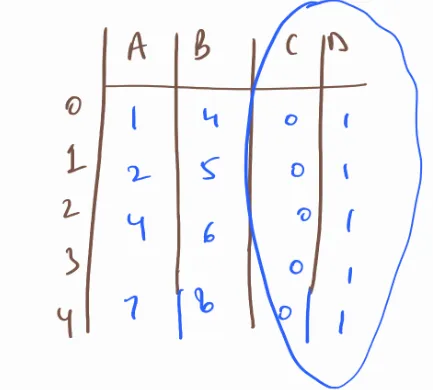

https://medium.com/nerd-for-tech/removing-constant-variables-feature-selection-463e2d6a30d9


### 3) Transformation:
Eger variable'larimiz yani data'larimiz normal distribution'a sahip degil ise bu data'larimizi Gauss distribution'ina donusturmek icin <b>transformation</b> method'larini kullanabiliriz. Bu proje kapsaminda <b>Yeo-Johnson Transformation</b>'ini kullanacagiz.
### 4) Selecting Best Model and Parameters:
RandomizedSearchCV, bir specific model icin hyperparameter aramasini gerceklestirmek icin kullanilan bir cross-validation tool'udur. 
Bu tool, bir search tree yerine random samples uzerinden gerceklestirir.

In [45]:
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Sklearn output'unun numpy array olarak return etmemesi icin kullanilir.
from sklearn import set_config
# Pandas olarak return eder.
set_config(transform_output="pandas")

preprocessor = Pipeline([
    ('scaler', MinMaxScaler()),
    ('variance', VarianceThreshold()),
    ('power_transform', PowerTransformer())] # Default method='yeo-johnson'
)

# Model Pipeline'ini olustur.
pipeline = Pipeline([
    ('preprocessor', preprocessor), # Pipeline'i calistirir.
    ('classifier', RandomForestClassifier()) # Pipeline kullanilarak X_train hazirlandiktan sonra train icin kullanilacak classifier.
])

# Hiperparametreleri belirle.
param_distributions = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [None, 5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False],
}

# RandomizedSearchCV ile pipeline'i uygula, modeli egit ve en iyi parametreleri bul.
random_search = RandomizedSearchCV(pipeline, # Model icin olusturulan pipeline'dir. 
                                   param_distributions=param_distributions, # Hiperparametreler.
                                   n_iter=10, # Searching isleminin ne kadar genis veya kisitli olacagini kontrol etmenize olanak tanir.
                                   cv=5, # Dataset'imizin kac parcaya bolunup, her bir parcadan test icin kac parcanin kullanilacagini belirler. 
                                   random_state=42,
                                   n_jobs=-1, # Tum cpu'larin kullanilmasini saglar.
                                   error_score='raise') 
# Modeli Egit.
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=Pipeline(steps=[('preprocessor',
                                              Pipeline(steps=[('scaler',
                                                               MinMaxScaler()),
                                                              ('variance',
                                                               VarianceThreshold()),
                                                              ('power_transform',
                                                               PowerTransformer())])),
                                             ('classifier',
                                              RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'classifier__bootstrap': [True, False],
                                        'classifier__max_depth': [None, 5, 10,
                                                                  15],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': [50, 100,
                                                                     150]},
                   random_state=42)

## Model Results:
GridSearchCV()'nin en iyi model ve parametre olarak neleri sectigini gorelim ve prediction sonuclarina bakalim.

In [46]:
print('Best Parameters: ', random_search.best_params_) # En iyi parametreler.
print('Best Score: ', random_search.best_score_) # En iyi score.

# Test seti uzerinde en iyi modeli kullanarak prediction islemi:
y_pred = random_search.best_estimator_.predict(X_test)

Best Parameters:  {'classifier__n_estimators': 50, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': 15, 'classifier__bootstrap': False}
Best Score:  0.6850863573765603


In [47]:
# Model Sonucu ile prediction'lari Karsilastir.
y_test_in = le.inverse_transform(y_test)
y_pred_in = le.inverse_transform(y_pred)

In [48]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, mean_squared_error

# Training Sonuclari:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
mse = mean_squared_error(y_test, y_pred)

print('Accuracy Score: ', accuracy)
print('Precision Score: ', precision)
print('Recall Score: ', recall)
print('F1 Score: ', f1)
# y_pred ile y_test arasindaki hata miktari:
print("Mean Squared Error:", mse)

Accuracy Score:  0.6934673366834171
Precision Score:  [0.84263959 0.65964912 0.52173913]
Recall Score:  0.6934673366834171
F1 Score:  0.685963028893356
Mean Squared Error: 0.5175879396984925


In [49]:
# Modelimizin test data'larina ne tur cevaplar verdigini iterative olarak gormek icin:
for i in range(len(y_test)):
    print(f"Epoc:{i}, Predicted:{y_test_in[i]}, Model Prediction:{y_pred_in[i]}, Correct: {y_test_in[i] == y_pred_in[i]}")

Epoc:0, Predicted:F, Model Prediction:F, Correct: True
Epoc:1, Predicted:T, Model Prediction:H, Correct: False
Epoc:2, Predicted:T, Model Prediction:T, Correct: True
Epoc:3, Predicted:H, Model Prediction:H, Correct: True
Epoc:4, Predicted:H, Model Prediction:H, Correct: True
Epoc:5, Predicted:T, Model Prediction:T, Correct: True
Epoc:6, Predicted:T, Model Prediction:H, Correct: False
Epoc:7, Predicted:F, Model Prediction:F, Correct: True
Epoc:8, Predicted:F, Model Prediction:F, Correct: True
Epoc:9, Predicted:T, Model Prediction:H, Correct: False
Epoc:10, Predicted:H, Model Prediction:H, Correct: True
Epoc:11, Predicted:F, Model Prediction:T, Correct: False
Epoc:12, Predicted:F, Model Prediction:H, Correct: False
Epoc:13, Predicted:F, Model Prediction:F, Correct: True
Epoc:14, Predicted:H, Model Prediction:H, Correct: True
Epoc:15, Predicted:F, Model Prediction:F, Correct: True
Epoc:16, Predicted:H, Model Prediction:H, Correct: True
Epoc:17, Predicted:H, Model Prediction:H, Correct: Tr

## Confusion Matrix:

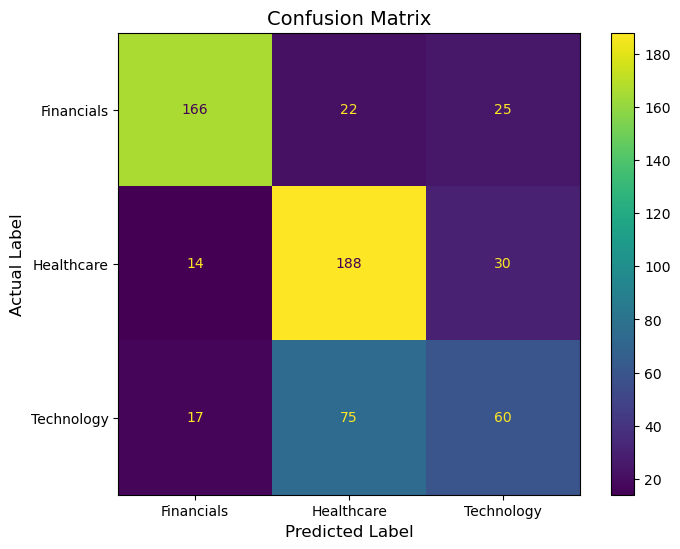

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Modelin actual data'lara yaptigi prediction sonuclarini gorsellestirmek icin confusion matrix olustur.
cm = confusion_matrix(y_test, y_pred) 

class_names = ['Financials', 'Healthcare', 'Technology']

# Confusion Matrix'i Gorsellestirme.
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax)

# Tag ve Header ekle.
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)

plt.show()

## Bonus: Real Estate Sector Predictions
Train edilmis modelimizi kullanarak real estate sektorundeki data'ların hangi sektore benzedigini gorelim.

In [ ]:
fetch_data(sectors="real-estate").to_csv("Datasets/Real-Estate.csv")

real_estate = pd.read_csv("Datasets/Real-Estate.csv")

In [ ]:
valid_symbols_re = [str(symbol) for symbol in real_estate.Symbol if isinstance(symbol, str)]

real_estate_data = yf.download(valid_symbols_re, start='2005-01-01') 

real_estate_data_open = real_estate_data['Open'].resample("M").last().pct_change() + 1

In [ ]:
re_df = get_ts(real_estate_data_open)
re_df.dropna(inplace=True)

last_re_df = extracting_symbols_features(re_df)

In [ ]:
last_re_df.reset_index(inplace=True)

In [ ]:
last_re_df.drop('index', axis=1, inplace=True)

In [ ]:
last_re_df_X = last_re_df.copy()
last_re_df_X.replace([np.inf, -np.inf], 0, inplace=True)

last_re_df_X

Modelimizin kullandigi feature'lari gormek icin:

In [ ]:
clf = pipeline[-1]

df_importances = pd.DataFrame(clf.feature_names_in_, columns=['Feature'])

df_importances

In [ ]:
last_re_df_X_processed = preprocessor.fit_transform(last_re_df_X)

In [ ]:
y_pred = random_search.predict(last_re_df_X_processed)

In [ ]:
y_pred_labels = le.inverse_transform(y_pred)

## Save Model By Onnx:
Scikit-learn modelleri icin uyumlu olan skl2onnx library'si icerisindeki convert_sklearn() method'unu kullanarak modelimizi istedigimiz formatta save edebiliriz.

In [51]:
import warnings
# Cast etme warning'ini gormek istemiyorsak kullanilabilir.
warnings.filterwarnings("ignore", message="overflow encountered in cast")

from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# En iyi modeli alın
best_model = random_search.best_estimator_

# ONNX formatına dönüştürme için giriş veri tipini belirtin
initial_type = [('float_input', FloatTensorType([None, X_train.shape[1]]))]

# Scikit-learn modelini ONNX formatına dönüştürün
onnx_model = convert_sklearn(best_model, initial_types=initial_type)

# ONNX modelini dosyaya kaydedin
with open("best_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())